# K-means 诱导攻击实验

In [1]:
import os
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection
from sklearn.cluster import MiniBatchKMeans as KMeans
from sklearn.manifold import TSNE
from sklearn.externals import joblib

D:\dev_tools\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
#处理域名的最小长度
MIN_LEN=10

#随机程度
random_state = 170

In [3]:
def load_alexa(filename):
    domain_list=[]
    csv_reader = csv.reader(open(filename))
    for row in csv_reader:
        domain=row[1]
        if len(domain) >= MIN_LEN:
            domain_list.append(domain)
    return domain_list

def domain2ver(domain):
    ver=[]
    for i in range(0,len(domain)):
        ver.append([ord(domain[i])])
    return ver


def load_dga(filename):
    domain_list=[]
    #xsxqeadsbgvpdke.co.uk,Domain used by Cryptolocker - Flashback DGA for 13 Apr 2017,2017-04-13,
    # http://osint.bambenekconsulting.com/manual/cl.txt
    with open(filename) as f:
        for line in f:
            domain=line.split(",")[0]
            if len(domain) >= MIN_LEN:
                domain_list.append(domain)
    return  domain_list

In [4]:
def tsne_data():
    x1_domain_list = load_alexa("data/dga/top-100.csv")
    x2_domain_list = load_dga("data/dga/dga-cryptolocke-50.txt")
    x3_domain_list = load_dga("data/dga/dga-post-tovar-goz-50.txt")
    x_domain_list = np.concatenate((x1_domain_list, x2_domain_list,x3_domain_list))
    y1 = [0]*len(x1_domain_list)
    y2 = [1]*len(x2_domain_list)
    y3 = [1]*len(x3_domain_list)
    y = np.concatenate((y1, y2,y3))
    y_ = np.abs(y-1)
    cv = CountVectorizer(ngram_range=(2, 2), decode_error="ignore", token_pattern=r"\w", min_df=1)
    x = cv.fit_transform(x_domain_list).toarray()
    tsne = TSNE(learning_rate=100)
    plt_x = tsne.fit_transform(x)
    return x, y, y_, plt_x
    
def kmeans_dga():
    x, y, y_, plt_x = tsne_data()
    model=KMeans(n_clusters=2, max_iter=500, batch_size=1, random_state=random_state)
    model.fit(x)   
    joblib.dump(model,'model/kmeans.m')    
    y_pred = model.predict(x)
    yscore = 1 - np.sum(np.abs(y - y_pred)) / y_pred.shape[0]
    y_score = 1 - np.sum(np.abs(y_ - y_pred)) / y_pred.shape[0]
    result = max(yscore,y_score)
    print("准确率达到: {:.2f}%".format(result*100))
    return x, y_pred, plt_x

def plot(x,y_pred):
    for i,label in enumerate(x):
        x1,x2=x[i]
        if y_pred[i] == 1:
            plt.scatter(x1, x2, marker='o')
        else:
            plt.scatter(x1, x2, marker='x')
    plt.show()

准确率达到: 73.42%


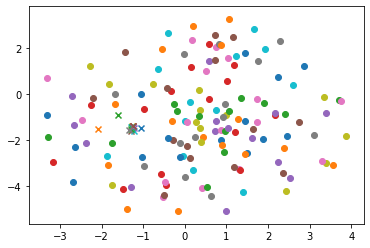

In [5]:
x, y_pred, plt_x = kmeans_dga()
plot(plt_x,y_pred)

# 开始诱导攻击

## 1.通过可视化确定目标

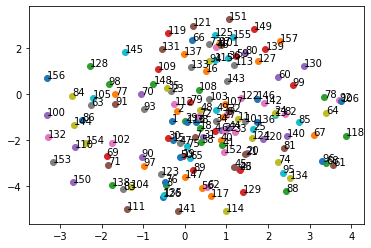

In [6]:
def plot_bad(x,y_pred):
    for i in range(x.shape[0]):
        x1,x2=x[i]
        if y_pred[i] == 1:
            plt.scatter(x1, x2, marker='o')
            plt.annotate(i, xy=(x1,x2), xytext=(x1,x2))
    plt.show()
    
plot_bad(plt_x, y_pred)

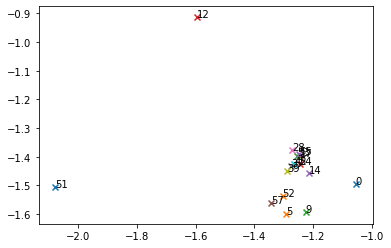

In [7]:
def plot_good(x,y_pred):
    for i in range(x.shape[0]):
        x1,x2=x[i]
        if y_pred[i] == 0:
            plt.scatter(x1, x2, marker='x')
            plt.annotate(i, xy=(x1,x2), xytext=(x1,x2))
    plt.show()
    
plot_good(plt_x, y_pred)

### 分析：确定攻击范围

In [8]:
x_from = np.array([x[0]])
x_to = np.array([x[118]])

In [9]:
x_from

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [10]:
x_to

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
model = joblib.load("model/kmeans.m")
print(model.predict(x_from))
print(model.predict(x_to))

[0]
[1]


## 2. 编写攻击过程

In [188]:
model = joblib.load("model/kmeans.m")
epoch = 250
step = 1
points_num = 10
decay_ratio = 0.1

### 2.1 建立攻击数据库

In [189]:
def create_A(x_from, x_to, points_num):
    x1 = x_from[0,:]
    x2 = x_to[0,:]
    points = []
    for index in range(x1.shape[0]):
        points.append(np.linspace(x1[index],x2[index],points_num))
    points = np.array(points).T
    points = np.vstack([points, x2])
    print(points.shape)
    return points
    
A = create_A(x_from, x_to, 9)

(10, 983)


### 2.2 编写单点攻击过程

In [195]:
def D(a, model):
    alpha = 1
    is_success = True
    for e in range(epoch):
        model.partial_fit(a)
        result = model.predict(a)
        if 1 in result:
            alpha += 1
            att_points = np.repeat(a, alpha, axis=0)
            model.partial_fit(att_points)
            is_success = False
        else:
            print("该数据点增量到{}时攻击成功".format(alpha))
            is_success = True
            break
    if (e == epoch -1) and (is_success == False):
        print("该攻击点无法完成攻击")
    return is_success


### 2.3 编写完整采样攻击过程

In [196]:
def Point_Search(A, model):
    keep_success = True
    for a in A[::step]:
        result = D(np.array([a]), model)
        if result == False:
            print("攻击链断裂")
            keep_success = False
            break
    print("执行完成！")
    return keep_success

In [197]:
print(model.predict(x_from))
print(model.predict(x_to))

[0]
[1]


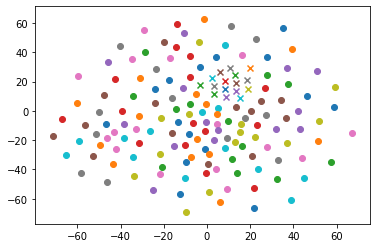

In [198]:
attacked_y_pred = model.predict(x)
plot(plt_x, attacked_y_pred)

### 2.4 编写优化过程

In [199]:
result = True
while result:
    model = joblib.load("model/kmeans.m")
    points_num -= 1
    if points_num > 0:
        print("采样库数量：{}".format(points_num))
        A = create_A(x_from, x_to, points_num)
        result = Point_Search(A,model)
    else:
        break

采样库数量：8
(9, 983)
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到83时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
执行完成！
采样库数量：7
(8, 983)
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到114时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
执行完成！
采样库数量：6
(7, 983)
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到75时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
执行完成！
采样库数量：5
(6, 983)
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到69时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
执行完成！
采样库数量：4
(5, 983)
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
该数据点增量到69时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
执行完成！
采样库数量：3
(4, 983)
该数据点增量到1时攻击成功
该数据点增量到94时攻击成功
该数据点增量到1时攻击成功
该数据点增量到1时攻击成功
执行完成！
采样库数量：2
(3, 983)
该数据点增量到1时攻击成功
该数据点增量到94时攻击成功
该数据点增量到1时攻击成功
执行完成！
采样库数量：1
(2, 983)
该数据点增量到1时攻击成功
该数据点增量到94时攻击成功
执行完成！


## 3. 攻击分析

In [15]:
model = joblib.load("model/kmeans.m")
points_num = 10
step = 1

def Create_A(x_from, x_to, points_num):
    x1 = x_from[0,:]
    x2 = x_to[0,:]
    points = []
    for index in range(x1.shape[0]):
        points.append(np.linspace(x1[index],x2[index],points_num))
    points = np.array(points).T
    points = np.vstack([points, x2])
    print(points.shape)
    return points

def Point_Attack(a, model):
    alpha = 1
    att_points = np.repeat(a, alpha, axis=0)
    model.partial_fit(att_points)
    if 1 in model.predict(a):
        print("该点失败！")
        is_success = False
    else:
        print("该点攻击成功！")
        is_success = True
    return is_success, model

def Point_Search(A, model):
    keep_success = True
    for a in A[::step]:
        result, model = Point_Attack(np.array([a]), model)
        if result == False:
            print("攻击链断裂")
            keep_success = False
            break
    print("执行完成！")
    return keep_success, model

def Opt(points_num):
    result = True
    while result:
        model = joblib.load("model/kmeans.m")
        points_num -= 1
        if points_num > 0:
            print("采样库数量：{}".format(points_num))
            A = Create_A(x_from, x_to, points_num)
            result, model = Point_Search(A,model)
        else:
            break
            

Opt(points_num)

采样库数量：9
(10, 983)
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
执行完成！
采样库数量：8
(9, 983)
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
执行完成！
采样库数量：7
(8, 983)
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
执行完成！
采样库数量：6
(7, 983)
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点失败！
攻击链断裂
执行完成！


## 4. 最终攻击过程

In [16]:
points_num = 7

model = joblib.load("model/kmeans.m")
A = Create_A(x_from, x_to, 9)
result, model = Point_Search(A,model)

print(model.predict(x_from))
print(model.predict(x_to))

if 0 in model.predict(x_to):
    print("攻击成功了！")
    if 1 in model.predict(x_from):
        print("效果超凡！")

(10, 983)
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
该点攻击成功！
执行完成！
[0]
[0]
攻击成功了！


## 5. 后记
* 这种攻击，就是权衡 A 与 Alpha 的数据量

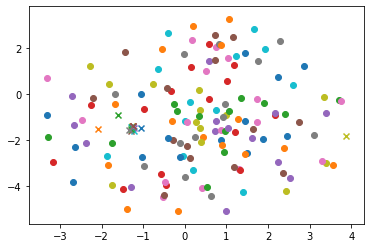

In [17]:
attacked_y_pred = model.predict(x)
plot(plt_x, attacked_y_pred)